# Short Skimage Tutorial

This is a very short introduction to the [Scikit-image library](http://scikit-image.org/), including the main operations for image manipulation.

What is an image? Images are n-dimensional arrays where each element corresponds to a pixel. 

The most common image kinds are:
a) grey-level images containing 1 channel of X rows and Y columns.
b) RGB /color images containing 3 channels per color (RGB) where each channel/plane is formed by X rows and Y columns.

Images manipulated by the Scikit-image library are stored as Numpy arrays. According to what type are the values of the pixels, we can have different [types of images](http://scikit-image.org/docs/stable/user_guide/data_types.html?highlight=image%20type). 

 See [A crash course on NumPy for images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing) for more information.

## Reading and writing images

Utilities to read and write images in various formats are available in the Module `io`.

In [12]:
%pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.9 MB 10.3 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.9 MB 11.8 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.9 MB 9.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 10.5 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/12.9 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   -- ------------------------------------- 3.1/43.6 MB 15.3 MB/s eta 0:00:03
   ----- ---------------------------------- 6.3/43.6 MB 14.6 MB/s eta 0:00:03
   -------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


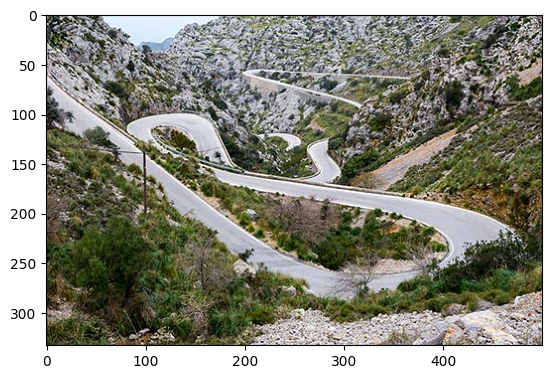

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: Images/black_image.bmp is a low contrast image
  return func(*args, **kwargs)


In [1]:
from skimage import io #necessary to read and write images
import matplotlib.pyplot as plt #necessary to display images

img = io.imread('Images/sacalobra.jpeg') # Leest image en laat image in als NumPy array (bevat pixelwaarden van de afbeelding)

plt.imshow(img) #Visualizing a figure with the image
plt.show()  # toont de afbeelding in een apart venster 

img2 = img*0 # Vermenigd elke pixelwaarde in de img met 0 -> nieuwe array met dezelfde dimensies als img maar alle pixelwaarden zijn 0 (vollegdig zwarte afbeelding)
io.imsave('Images/black_image.bmp',img2)

**Exercise**: Visualize the image you just stored on the disk.

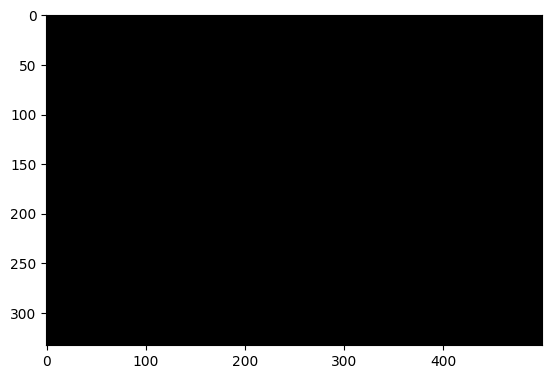

In [3]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('Images/black_image.bmp')
plt.imshow(img)
plt.show()

Scikit-image provides a set of [standard test images](http://scikit-image.org/docs/dev/api/skimage.data.html?highlight=imread#skimage.data.imread) in the Module `data`: astronaut, binary_blobs, camera, checkerboard, chelsea, clock, coffee, coins, etc.

<class 'numpy.ndarray'>
(512, 512)
262144


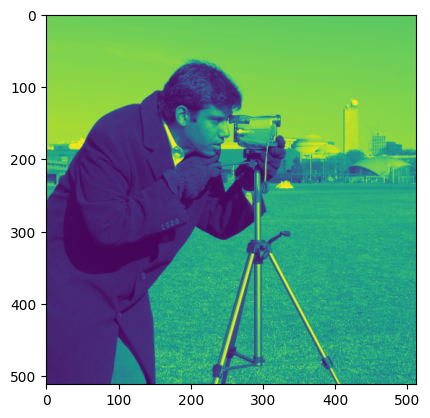

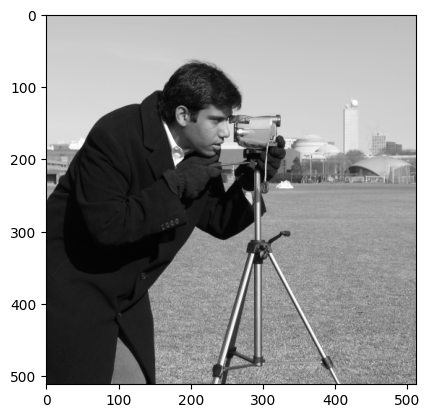

In [5]:
from skimage import data

camera = data.camera()
print(type(camera)) # datatype image
print(camera.shape) # shape of the image = tuple (hoogte,breedte)(afbeelding 512 pixels hoog en 512 pixels breed)
print(camera.size) # totaal aantal pixels in de afbeelding = hoogte * breedte = 512 * 512
plt.imshow(camera) # Omdat afbeelding uit grijswaarden bestaat probeert Mathplotlib de afbeelding in kleur weer te geven (afbeelding onnatuurlijk)
plt.show()

plt.imshow(camera, cmap='gray') # we can visualize the image 'camera' in gray scale colormap, 
                                #you can look at matplotlib for different colormaps 
                            
plt.show()

## Basic image manipulation

NumPy arrays representing images can be of different numerical types, such as integer or float. 

See [Image data types and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html#data-types) for more information about these types and how scikit-image treats them.

How shall we change the type of an image?

In [13]:
from skimage import img_as_float # zet datatype om naar float 
import numpy as np

image = np.arange(0, 50, 10, dtype=np.uint8) # arange function defines a vector from 0 to 50 in steps of 10. 50 is niet inbegrepen, datatype is uint8: unsigned integer 8 bits (standaard datatype voor afbeeldingen (afbeeldingpixels met waarden van 0 tot 255))
print(image)


[ 0 10 20 30 40]


What is the difference between the two following operations?

In [17]:
print(image.astype(float)) # methode van een Numpy array om de datatype van de array te veranderen naar float, 
                            #pixelwaarden letterlijk oevergenomen maar opgeslagen als floats, waarden precies hetzelfde maar manier waarop ze worden opgeslagen (datattype) is veranderd
print(img_as_float(image)) # Converteert de pixelwaarden van de afbeelding naar float64 type, maar past ook normalisatie toe op de waarden (waarden worden geschaald tussen 0 en 1)
                            # waarden berekend door de waarde van de pixel te delen door 255 (maximale waarde van een pixel in een uint8 afbeelding)

[ 0. 10. 20. 30. 40.]
[0.         0.03921569 0.07843137 0.11764706 0.15686275]


How to convert an image from `uint8` to `float`? And from `float` to `uint8`?

In [28]:
from skimage import img_as_ubyte

print("\nstart image:")
print(image)
print(type(image))
print(image.dtype)

print("\nfloat image:")
float_image = img_as_float(image)
print(float_image)
print(type(float_image))
print(float_image.dtype)

print("\nBack to uint8:")
uint8_image = img_as_ubyte(float_image) # zet de pixelwaarden van de afbeelding terug naar uint8
print(uint8_image)
print(type(uint8_image))
print(uint8_image.dtype)


start image:
[ 0 10 20 30 40]
<class 'numpy.ndarray'>
uint8

float image:
[0.         0.03921569 0.07843137 0.11764706 0.15686275]
<class 'numpy.ndarray'>
float64

Back to uint8:
[ 0 10 20 30 40]
<class 'numpy.ndarray'>
uint8


## Spatial and photometric resolution: 
### Function `rescale` 

Sometimes we need to change the spatial and photometric resolution of an image. For this, we will use functions like rescale and resize. Consider the following example:

In [37]:
from skimage import data # data bevat een aantal standaard afbeeldingen
from skimage.transform import rescale #afbeeldingen vergroten/verkleinen 

image = data.coins()
print(image.dtype, image.min(), image.max(), image.shape) # min (donkerste intensiteit (zwart)) en max (lichtste intensiteit (wit)) geven de minimale en maximale pixelwaarden van de afbeelding weer (0 en 255 voor uint8 afbeeldingen)

uint8 1 252 (303, 384)


In [36]:
rescaled = rescale(image, 0.5) # de afbeelding wordt gehalveerd in grootte (0.5) (zowel breedte als hoogte) (dus dimensies/2)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape) # round on 4 decimalen, omdat waarden zijn genormaliseerd (naar float gemaakt) zijn de waarden tussen 0 en 1

float64 0.0189 0.9156 (152, 192)


What does the function rescale do? Check skimage documentation. What is the difference with the resize command?

float64 4.8223 233.475 (152, 192)


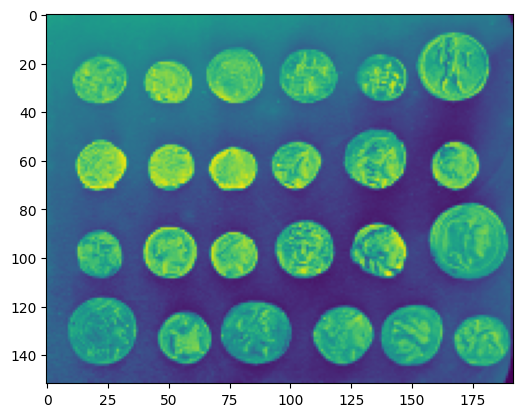

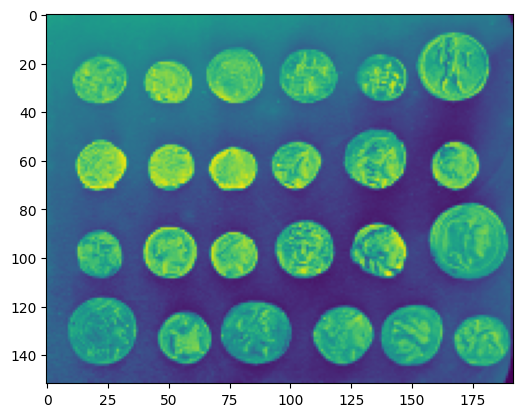

In [42]:
rescaled2 = rescale(image, 0.5, preserve_range=True) #met preserve_range=True worden de pixelwaarden van de afbeelding behouden (geen normalisatie), anders werden ze genormaliseerd naar float64 (0-1)
print(rescaled2.dtype, np.round(rescaled2.min(),4), np.round(rescaled2.max(),4), rescaled2.shape)


plt.imshow(rescaled)
plt.show()
plt.imshow(rescaled2)
plt.show()

How to rescale intensity values?

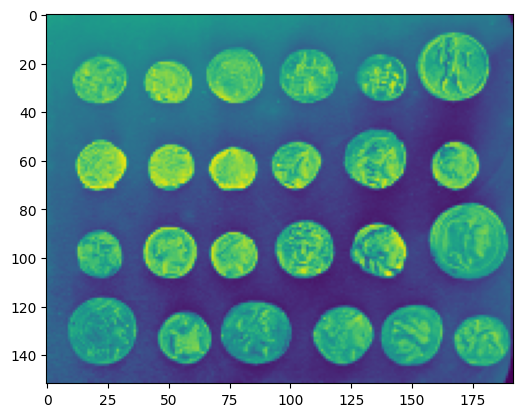

In [48]:
# Eigen code
import skimage as ski
image = ski.exposure.rescale_intensity(rescaled2, in_range=(0, 2**10 - 1))
image = ski.exposure.rescale_intensity(rescaled2, in_range='uint10')
plt.imshow(image)
plt.show()

255 0 (512, 512)


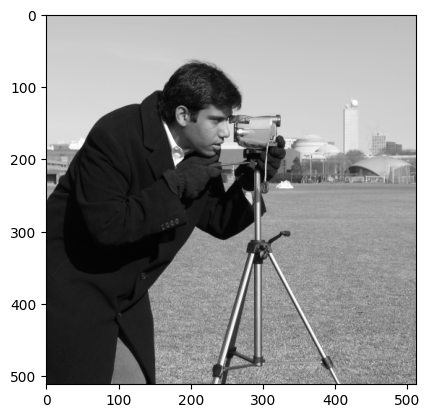

In [51]:
camera = data.camera()
print(camera.max(), camera.min(), camera.shape)
plt.imshow(camera, cmap='gray')
plt.show()

127.5 0.0 (512, 512)


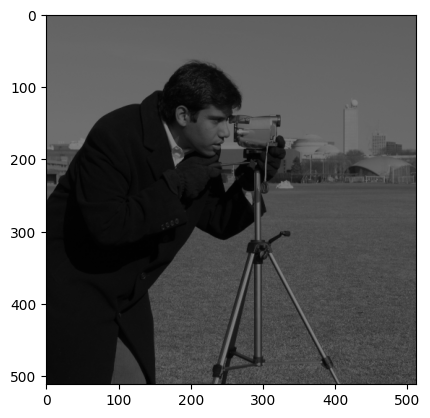

In [55]:
camera2 = camera/2
print(camera2.max(), camera2.min(), camera2.shape)
plt.imshow(camera2, cmap='gray', vmin=0, vmax=255) #vmin: minimum waarde van de colormap, vmax: maximum waarde van de colormap die moeten worden weergegeven in de afbeelding
plt.show()

227.5 100.0 (512, 512)


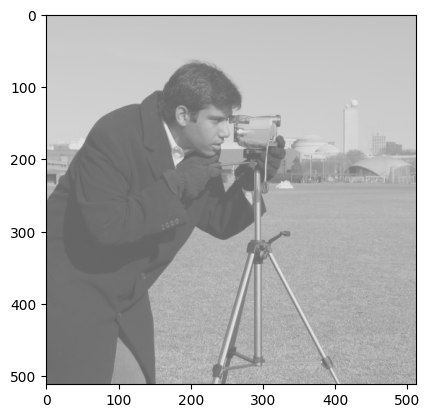

In [56]:
camera3 = camera2+100
print(camera3.max(), camera3.min(), camera3.shape)
plt.imshow(camera3, cmap='gray', vmin=0, vmax=255)
plt.show()

233 3 (64, 64)


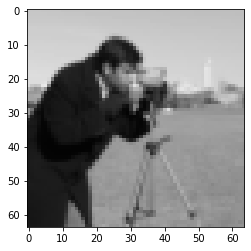

In [11]:
from skimage.transform import resize
from skimage import img_as_ubyte # img_as_ubyte Convert an image to 8-bit unsigned integer format

camera4 = img_as_ubyte(resize(camera,(64,64))) 
print(camera4.max(), camera4.min(), camera4.shape)
plt.imshow(camera4, cmap='gray', vmin=0, vmax=255)
plt.show()

More examples can be seen in the [Matplotlib Image tutorial](https://matplotlib.org/users/image_tutorial.html).

## Color (RGB) images

A color image is a NumPy array, with an additional trailing dimension for the channels. See [Scikit-image Color images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#color-images) for more information.

<class 'numpy.ndarray'>
(300, 451, 3)


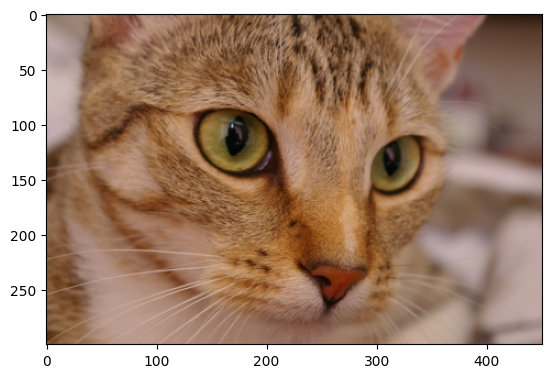

In [69]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)
plt.show()

Remember the way `numpy` allows us to index certain positions in a matrix. If we have a matrix `M`, we can access to a certain pixel `(i,j)` using the command `M[i,j]`, where `i` is the row and `j` the column. In order to index all the positions, we have to use the character `:`.

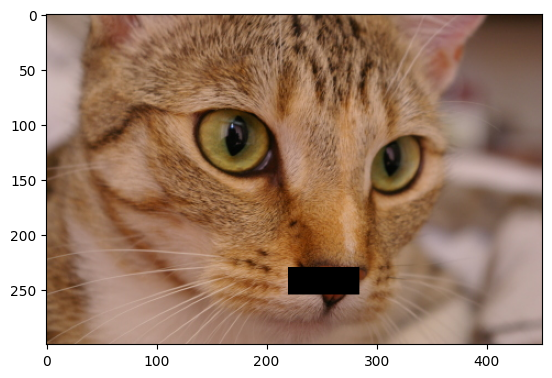

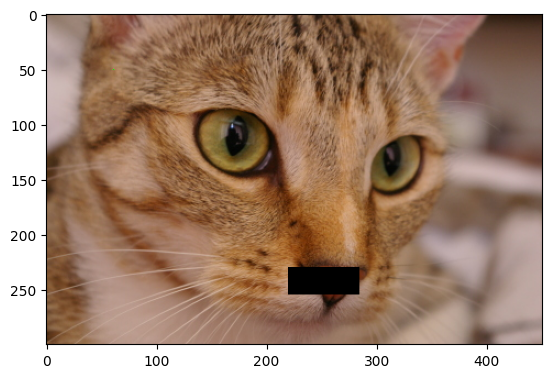

In [70]:
cat[230:255, 220:285] = 0 # set the pixels at rows from 230 to 255, columns from 220 to 285 to black
plt.imshow(cat)
plt.show()

cat[50, 61] = [0, 255, 0] # set the pixel at row 50, column 61 to green; remember [red, green, blue]
plt.imshow(cat)
plt.show()

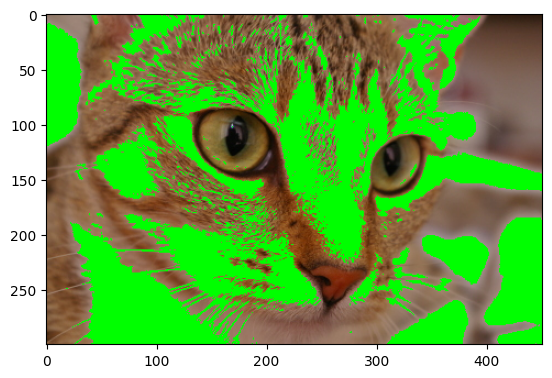

In [74]:
cat = data.chelsea()
reddish = cat[:, :, 0] > 160 # seleceert eerste kleur kanaal = rood, voor elke rode waarde wordt gekeken of die groter is dan 160 (veel rood) : output = True/False (redisch zelfde hoogte en breedte als afbeelding)
cat[reddish] = [0, 255, 0] # selecteert alles pixels die veel rood bevatten , de geselecteerde pixels worden ingesteld op groen (0,255,0)
plt.imshow(cat)
plt.show()

Note that it is always much faster to iterate on the rightmost indices. See the following example:

In [73]:
def in_order_multiply(arr, scalar):
     for plane in range(arr.shape[0]):
         arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
     for plane in range(arr.shape[2]):
         arr[:, :, plane] *= scalar

import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()

print("%.2f seconds" % (t1 - t0))  

im3d_t = np.transpose(im3d).copy() # place "planes" dimension at end
im3d_t.shape
s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()

print("%.2f seconds" % (s1 - s0))  
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.07 seconds
1.45 seconds
Speedup: 21.1x


Addendum to dimension names and orders in Scikit-image:

Image type: 2D color video       
Coordinates: (t, row, col, ch)

## Image adjustment: transforming image content


### Color manipulation

Most functions for manipulating color channels are found in the Module `color`. See [Scikit-image Color manipulation](http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html) for more information.

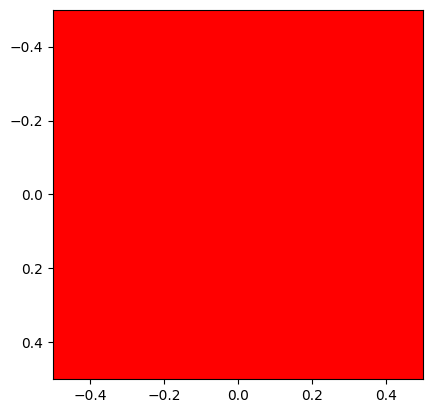

In [75]:
from skimage import color

# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8) # de 1e dimensie is de hoogte, de 2e dimensie is de breedte en de 3e dimensie is de kleurkanalen (RGB), 1/2 dimensie maar 1 pixel dus (1,1,3)
                                                          # de kleurenkanalen worden gezet op 255, 0 en 0 (rood)
             
plt.imshow(red_pixel_rgb)
plt.show()


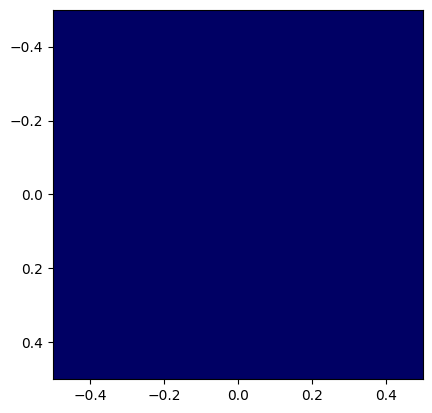

In [78]:
# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
plt.imshow(dark_blue_pixel_rgb)
plt.show()


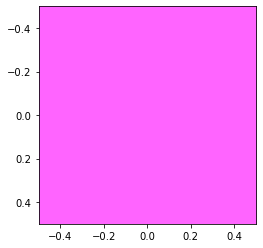

In [18]:
# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
plt.imshow(pink_pixel_rgb)
plt.show()


### Conversion from RGBA to RGB - Removing alpha channel through alpha blending

Converting an RGBA image to an RGB image by alpha blending it with a background is realized with `rgba2rgb()`

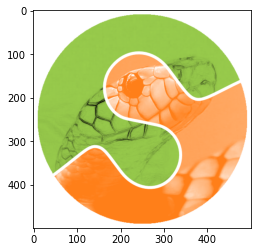

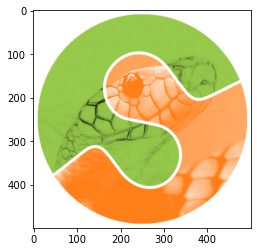

In [ ]:
from skimage.color import rgba2rgb # Convert RGBA image (met transparantie) to RGB image (zonder transparantie) by ignoring the alpha channel. = alpha blending (cmbineerd transparantie pixels met een achtergrondskleur)
# RGBA has 24 bits for RGB color, but there is an additional 8 bit value for transparency.

img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)
plt.imshow(img_rgba)
plt.show()
plt.imshow(img_rgb)
plt.show()

### Conversion between color and gray values

Often we will need rto convert color images to gray level images. Converting an RGB image to a grayscale image is per with `rgb2gray()`

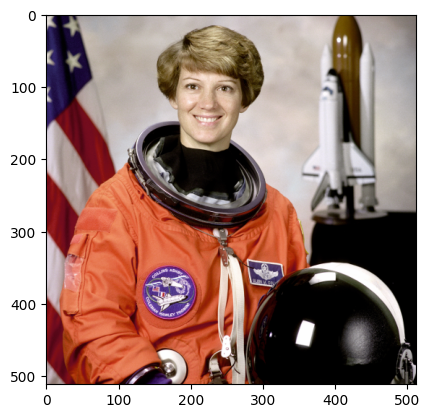

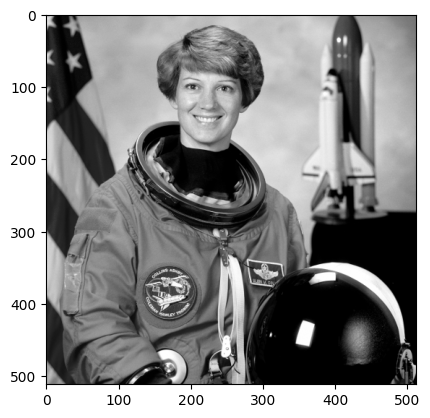

In [80]:
from skimage.color import rgb2gray # Convert an RGB image to a grayscale image , resultaat = 2D array waarin elke pixel 1 intensiteitswaarde heeft (grijswaarden) i.p.v 3 (RGB) 
                                    # Intensiteitswaarde berekent door gewogen gemiddelde van de 3 kleurkanalen (R,G,B) te nemen

img = data.astronaut()
img_gray = rgb2gray(img)
plt.imshow(img)
plt.show()
plt.imshow(img_gray, cmap='gray')
plt.show()

Note that:

In [81]:
print (img_gray.dtype, img_gray.max())

float64 1.0


In [94]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print(rgb2gray(red_pixel))

green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print (rgb2gray(green_pixel))


[[0.2125]]
[[0.7154]]


Given a gray image, how would it be looking if it is converted to RGB values? 

## Displaying  images and graphics

[Matplotlib](https://matplotlib.org/index.html) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

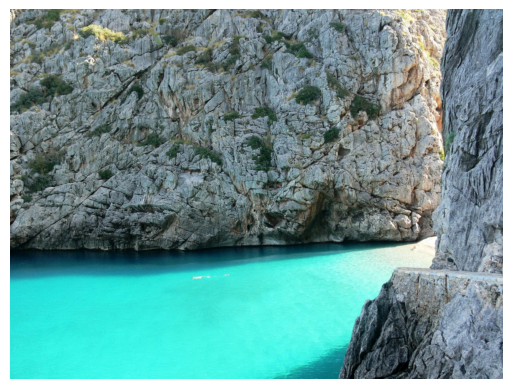

In [95]:
"""
Simple demo of the imshow function.
"""
import matplotlib.pyplot as plt #the basic module for plotting/displaying figures

image_file = 'Images/sacalobrabeach.jpeg'
image = plt.imread(image_file) # leest image als NumPy array (vaak matrix van pixels)
# grijs: (hoogte/breedte)
# kleur (RGB): (hoogte/breedte/3)
# kleur + transparantie (RGBA): (hoogte/breedte/4)

fig, ax = plt.subplots() # create a new figure f with een assenobject ax voor de grafiek
ax.imshow(image) # toont de afbeelding op de assen ax als een afbeelding
ax.axis('off')  # clear x- and y-axes (verwijdert de x- en y-assen : alleen images zelf weergegeven)
plt.show()

(190, 265, 3)


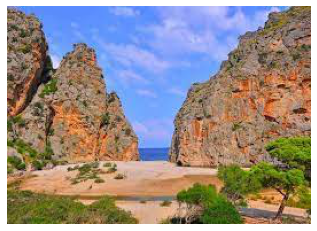

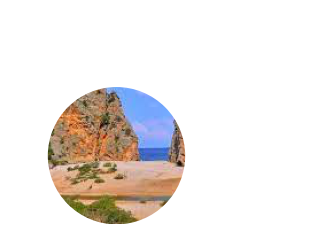

In [ ]:
"""
Demo of image that's been clipped by a circular patch.
"""
import matplotlib.pyplot as plt # gebruikt voor het plotten van afbeeldingen/grafieken
import matplotlib.patches as patches # gebruikt voor het maken van patches (vormen zoals cirkels, rechthoeken, etc.)


image_file = 'Images/sacalobragap.jpeg'
image = plt.imread(image_file)
print(image.shape)

# Demo image
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes


# Adding the circular path
fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((95, 130), radius=60, transform=ax.transData) # creeert een cirkel met middelpunt (95,130) en straal 60, uitknipgebied
im.set_clip_path(patch) # snijdt de afbeelding uit met behulp van de gedefinieerde patch/circkel, alles buiten de circkel wordt verborgen (niet weergegeven)
ax.axis('off')

plt.show()



See how to visualize multiple images:

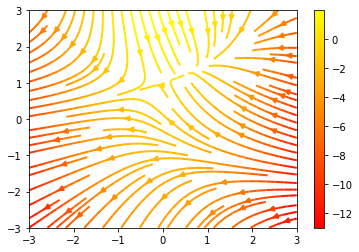

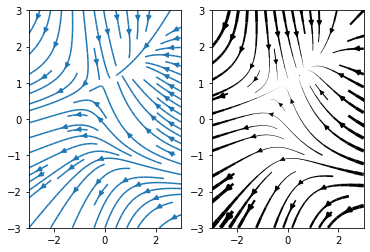

In [39]:
'''
Demo of the streamplot function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
'''

import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j] #returns a dense multi-dimensional “meshgrid”.
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn) #used to display 2D vector fields
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

Another [example](https://matplotlib.org/examples/pylab_examples/image_nonuniform.html) of how to display multiple images:

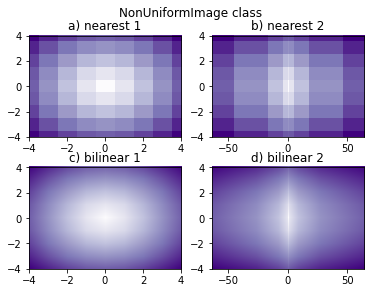

In [ ]:
'''
This illustrates the NonUniformImage class.  It is not
available via an Axes method but it is easily added to an
Axes instance as shown here.
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage # weergeven afbeeldingen met niet-uniforme pixelafstanden
from matplotlib import cm # een module voor colormaps

interp = 'nearest'

# Linear x array for cell centers:
x = np.linspace(-4, 4, 9) # een lineare array met waarden tussen -4 en 4, 9 waarden

# Highly nonlinear x array:
x2 = x**3 # niet meer linear omdat je de lineare array alles waardes tot de macht 3 verheft (x^3)

y = np.linspace(-4, 4, 9)

z = np.sqrt(x[np.newaxis, :]**2 + y[:, np.newaxis]**2) # een 2D array met waarden die berektn voor elk punt (X,y) op het grid = eculidische afstand van punt (x,y) tot de oorsprong (0,0)

fig, axs = plt.subplots(nrows=2, ncols=2) # maak een figuut met 2 rijen en 2 kolommen , raster voor 4 subplots 
fig.subplots_adjust(bottom=0.07, hspace=0.3) # past margen en ruimte tussen subplots aan
fig.suptitle('NonUniformImage class', fontsize='large') # voeg algemenen title toe aan figuur 

# Image a)
ax = axs[0, 0] # selecteert eerste subplot
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples) # creeert een non-uniform image object met de gegeven parameters (interpolatie, extent, colormap)
im.set_data(x, y, z) # verbindt de arrays x,y,x met de non-uniform image object
ax.images.append(im) # voeg de image toe aan de subplot/as
ax.set_xlim(-4, 4) # stelt grens x-as
ax.set_ylim(-4, 4) # stelt grens y-as
ax.set_title('a) ' + interp + ' 1')

# Image b)
ax = axs[0, 1]
im = NonUniformImage(ax, interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('b) ' + interp + ' 2')

interp = 'bilinear'

# Image c)
ax = axs[1, 0]
im = NonUniformImage(ax, interpolation=interp, extent=(-4, 4, -4, 4),
                     cmap=cm.Purples)
im.set_data(x, y, z)
ax.images.append(im)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('c) ' + interp + ' 1')

# Image d)
ax = axs[1, 1]
im = NonUniformImage(ax,  interpolation=interp, extent=(-64, 64, -4, 4),
                     cmap=cm.Purples)
im.set_data(x2, y, z)
ax.images.append(im)
ax.set_xlim(-64, 64)
ax.set_ylim(-4, 4)
ax.set_title('d) ' + interp + ' 2')

plt.show()


Visualize in a figure four images, in 2 rows and 2 columns: a) the cat, b) the cat with the black mask, c) the cat converted into gray levels and the cat with double reduced size. Add titles to explain what each image represents to. 

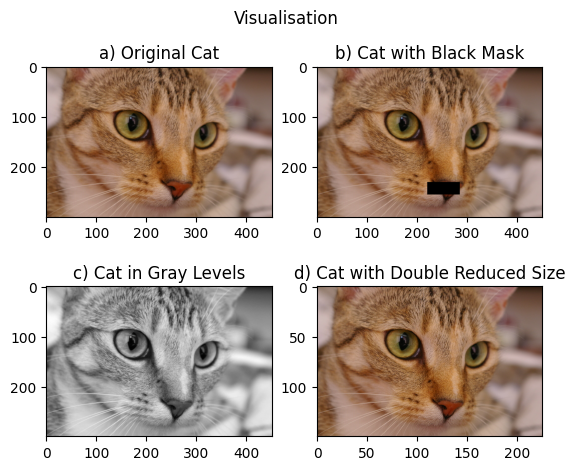

In [107]:
"""Solution"""
# Visualize in a figure four images, in 2 rows and 2 columns: a) the cat, b) the cat with the black mask, c) the cat converted into gray levels and the cat with double reduced size. 
# Add titles to explain what each image represents to. 


import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import rescale
from skimage import data

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(bottom=0.07, hspace=0.3)
fig.suptitle('Visualisation', fontsize='large')

# Image a (cat)
ax = axs[0, 0]
cat = data.chelsea()
ax.imshow(cat)
ax.set_title('a) Original Cat')

# Image b (cat with black mask)
ax = axs[0, 1]
cat_black_mask = cat.copy()
cat_black_mask[230:255, 220:285] = 0
ax.imshow(cat_black_mask)
ax.set_title('b) Cat with Black Mask')

# Image c (cat converted to gray levels)
ax = axs[1, 0]
cat_gray = color.rgb2gray(cat)
ax.imshow(cat_gray, cmap='gray')
ax.set_title('c) Cat in Gray Levels')

# Image d (cat with double reduced size)
ax = axs[1, 1]
cat_rescaled = rescale(cat, 0.5, anti_aliasing=True, channel_axis=-1)
ax.imshow(cat_rescaled)
ax.set_title('d) Cat with Double Reduced Size')

plt.show()
